In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# Creating a classification data
X, y = make_classification(
    n_features=5,
    n_redundant=0,
    n_informative=5,
    n_clusters_per_class=1,
)

In [4]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.039921,3.126651,2.797400,0.693165,0.391644,1
1,0.972679,0.856883,1.141501,-0.980720,-0.662228,0
2,0.104289,0.258121,1.206655,-0.147768,-1.744855,0
3,1.704123,1.071646,0.876592,-1.557482,0.348871,0
4,0.509584,0.682113,0.864831,-0.298033,-1.961961,0


In [5]:
0.3*df.shape[0]

30.0

In [6]:
# function for row sampling
# Returns 'percent' sample of df, with replacemnt
def sample_rows(df, percent):
    '''Returns 'percent' sample of df, with replacemnt'''
    return df.sample(int(percent*df.shape[0]), replace=True)

In [7]:
# function for feature sampling
# Returns 'percent' sample of df, with replacemnt
def sample_features(df, percent):
    '''Returns 'percent' features of df, with replacemnt'''
    cols = random.sample(df.columns.tolist()[
                         :-1], int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [8]:
# function for combined sampling
def combined_sampling(df, row_percent, col_percent):
    '''Returns subset of df, with replacemnt'''
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [9]:
df1 = combined_sampling(df, 0.5, 0.5)
df1.head()

,col5,col2,target
69,-0.642131,1.595096,1
35,-1.412218,-0.579918,0
58,-1.652136,2.997101,1
25,-1.656664,1.718505,1
78,-0.899789,-0.332969,1


In [10]:
df2 = combined_sampling(df, 0.5, 0.5)
df2.head()

,col2,col4,target
35,-0.579918,0.658445,0
5,2.679777,0.040036,1
29,0.675225,-0.098632,0
51,0.967990,1.664101,1
59,0.531211,0.955061,1


In [11]:
df3 = combined_sampling(df, 0.5, 0.5)
df3.head()

,col5,col1,target
4,-1.961961,0.509584,0
2,-1.744855,0.104289,0
24,-0.706740,0.707167,1
97,-1.617276,0.662208,0
21,-0.443467,1.085344,0


In [12]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col2', 'target'], dtype='object')
Index(['col2', 'col4', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')


In [13]:
df3

,col5,col1,target
4,-1.961961,0.509584,0
2,-1.744855,0.104289,0
24,-0.706740,0.707167,1
97,-1.617276,0.662208,0
21,-0.443467,1.085344,0
69,-0.642131,-0.128868,1
64,-0.960665,1.333619,0
20,-0.724553,0.842690,0
62,-0.918950,0.120876,0
47,-0.668438,-0.399689,1


In [14]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [15]:
clf1.fit(df1.iloc[:, 0:2], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:2], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:2], df3.iloc[:, -1])

DecisionTreeClassifier()

In [16]:
from sklearn.tree import plot_tree

[Text(0.5972222222222222, 0.9545454545454546, 'x[1] <= -0.344\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.5416666666666666, 0.8636363636363636, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5694444444444444, 0.9090909090909092, 'True  '),
 Text(0.6527777777777778, 0.8636363636363636, 'x[0] <= 0.246\ngini = 0.491\nsamples = 44\nvalue = [19.0, 25.0]'),
 Text(0.625, 0.9090909090909092, '  False'),
 Text(0.5972222222222222, 0.7727272727272727, 'x[0] <= -0.631\ngini = 0.5\nsamples = 39\nvalue = [19, 20]'),
 Text(0.4166666666666667, 0.6818181818181818, 'x[0] <= -0.958\ngini = 0.466\nsamples = 27\nvalue = [10, 17]'),
 Text(0.2222222222222222, 0.5909090909090909, 'x[0] <= -2.709\ngini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2777777777777778, 0.5, 'x[1] <= 1.093\ngini = 0.492\nsamples = 16\nvalue = [9, 7]'),
 Text(0.16666666666666666, 0.4090909090909091, 'x[1] <= 0.757\ngini = 0.375\nsamples = 8\

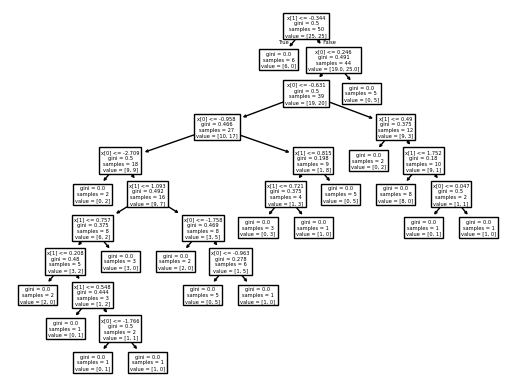

In [ ]:
plot_tree(clf1);

[Text(0.5769230769230769, 0.9285714285714286, 'x[1] <= 0.678\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.3076923076923077, 0.7857142857142857, 'x[0] <= 2.456\ngini = 0.293\nsamples = 28\nvalue = [23, 5]'),
 Text(0.4423076923076923, 0.8571428571428572, 'True  '),
 Text(0.15384615384615385, 0.6428571428571429, 'x[1] <= 0.128\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.23076923076923078, 0.5, 'x[0] <= 0.197\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.15384615384615385, 0.35714285714285715, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.3076923076923077, 0.35714285714285715, 'x[1] <= 0.215\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.23076923076923078, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.38461538461538464, 0.21428571428571427, 'x[1] <= 0.394\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3076923076923077, 0.07142857142857142,

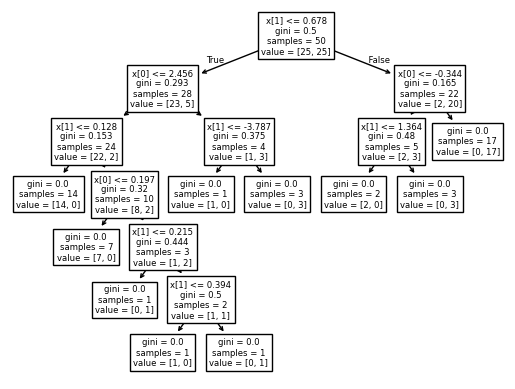

In [ ]:
plot_tree(clf2);

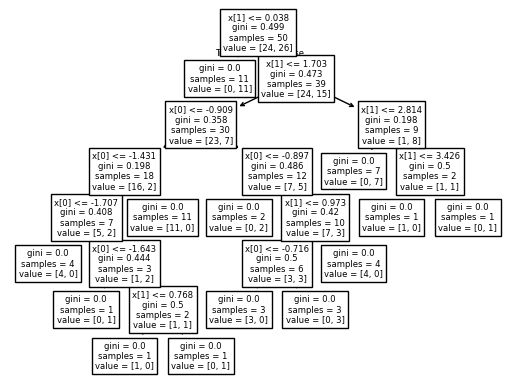

In [19]:
plot_tree(clf3);

In [20]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1, 2))

array([0])

In [21]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1, 2))

array([0])

In [22]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1, 2))

array([1])

In [33]:
df.sample(14, replace=True)

,col1,col2,col3,col4,col5,target
59,0.384671,0.531211,0.173793,0.955061,-1.668672,1
61,0.295974,-0.505342,0.880488,0.526985,-1.428847,0
40,0.909030,1.038594,1.284809,-0.071650,-1.704348,0
72,1.426078,1.420985,0.292143,-2.237666,-0.702464,0
44,0.903868,1.119098,1.861369,0.759739,0.850436,1
51,-0.505793,0.967990,0.892698,1.664101,0.554091,1
78,1.371845,-0.332969,0.545165,0.920573,-0.899789,1
94,0.850319,1.355467,1.768814,-0.965337,-0.964556,1
95,3.001753,2.762554,-0.245631,-3.461802,0.051041,0
87,2.111347,0.878514,2.417620,1.579548,0.022382,0
